In [1]:
import os
os.chdir('..')

In [2]:
import geopandas as gpd
import pandas as pd
import pickle
import yaml

from src.data import data_utils
from src.geo import geo_utils
from src.geo.geo_object import GeoObject, FeaturizedLayer
from src.features.featurize import Featurization, GeoFeaturizer
from src.visualization import kepler_visualize

CONFIG_PATH = 'config/config_moscow.yaml'

In [3]:
# !sudo apt install python3-rtree

In [3]:
config = yaml.load(open(CONFIG_PATH), Loader=yaml.FullLoader)
config

{'project_name': 'Moscow',
 'osm_shp_url': 'http://download.geofabrik.de/russia/central-fed-district-latest-free.shp.zip',
 'force_download_data': False,
 'path_to_data_raw': 'data/raw',
 'path_to_data_interim': 'data/interim',
 'path_to_data_processed': 'data/processed',
 'objects_to_featurize': {'h3': {'region_of_interest_shp': 'data/raw/Moscow.shp',
   'hexagons_resolution': 9},
  'polygons': {'layer_shp': 'coverage_moscow.shp'},
  'points': {'layer_shp': 'places.shp'}},
 'geo_objects': [{'eat_point': {'shp': 'gis_osm_pois_free_1.shp',
    'filters': {'fclass': ['restaurant',
      'cafe',
      'biergarten',
      'fast_food',
      'food_court']}}},
  {'drink_point': {'shp': 'gis_osm_pois_free_1.shp',
    'filters': {'fclass': ['pub', 'bar']}}},
  {'shop_point': {'shp': 'gis_osm_pois_free_1.shp',
    'filters': {'fclass': ['bakery',
      'books',
      'convenience',
      'department_store',
      'mall',
      'supermarket',
      'beverages',
      'butcher',
      'chemist',


In [9]:
# data_utils.download_osm_data(config['osm_shp_url'], config['path_to_data_raw'] + config['project_name'])

In [4]:
region_of_interest = geo_utils.load_shp(config['objects_to_featurize']['h3']['region_of_interest_shp'])

In [9]:
geo_objects = {}
for geo_obj_desc in config['geo_objects']:
    geo_object_name = list(geo_obj_desc.keys())[0]
    shp_filename = geo_obj_desc[geo_object_name]['shp']
    filters = geo_obj_desc[geo_object_name]['filters']
    geo_object = GeoObject(geo_object_name, config['path_to_data_raw'] 
                           + '/' + config['project_name'] + '/' + shp_filename, 
                           filters, region_of_interest)
    geo_objects[geo_object_name] = geo_object

In [5]:
feat_layer_hex = FeaturizedLayer.from_hexagons(
    config['objects_to_featurize']['h3']['region_of_interest_shp'], 
    config['objects_to_featurize']['h3']['hexagons_resolution'])
feat_layer_hex.layer.plot();

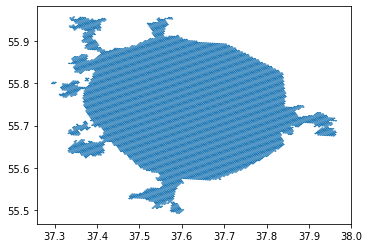

In [7]:
feat_layer_hex.layer.plot()

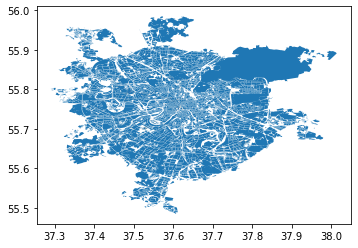

In [8]:
feat_layer_shp = FeaturizedLayer.from_shp(
    config['path_to_data_raw'] + '/' + config['objects_to_featurize']['polygons']['layer_shp'])
feat_layer_shp.layer.plot();

In [10]:
featurizations = []

for feat in config['featurizations']:
    name = list(feat.keys())[0]
    operation = feat[name]['operation']
    geo_object_name = feat[name]['geo_object']
    featurization = Featurization(name, operation, geo_object_name, feat[name])
    featurizations.append(featurization)

In [11]:
featurizer = GeoFeaturizer(feat_layer_hex, geo_objects, featurizations)
# featurizer = GeoFeaturizer(feat_layer_shp, geo_objects, featurizations)
featurizer.featurize()

/home/serjeeon/anaconda3/envs/env_37/lib/python3.7/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!(None != {'init': 'epsg:4326'})
  "(%s != %s)" % (left_df.crs, right_df.crs)
/home/serjeeon/anaconda3/envs/env_37/lib/python3.7/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!(None != {'init': 'epsg:4326'})
  "(%s != %s)" % (left_df.crs, right_df.crs)
/home/serjeeon/anaconda3/envs/env_37/lib/python3.7/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!(None != {'init': 'epsg:4326'})
  "(%s != %s)" % (left_df.crs, right_df.crs)
/home/serjeeon/anaconda3/envs/env_37/lib/python3.7/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!(None != {'init': 'epsg:4326'})
  "(%s != %s)" % (left_df.crs, right_df.crs)
/home/serjeeon/anaconda3/envs/env_37/lib/python3.7/site-packages/geopandas/tools/sjoin.py:61: Us

In [12]:
import keplergl

# with open('map_config', 'rb') as f:
#     config = pickle.load(f)

map_kepler = keplergl.KeplerGl(height=800)#, config=config
for name, geo_object in list(featurizer.geo_objects.items()):
    map_kepler.add_data(geo_object.layer, name=name);
map_kepler.add_data(data=featurizer.featurized_layer.layer, name='feat_layer')
map_kepler

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


KeplerGl(data={'eat_point': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2…

In [16]:
# kepler_visualize.draw_layers_kepler(feat_layer_hex.layer, layers_dict)

In [13]:
with open('map_config', 'wb') as f:
    pickle.dump(map_kepler.config, f)

In [18]:
operations = {'distance_to_closest', 'features_agg_buffer', 'features_of_closest',
            'count_contains', 'count_intersects', 'count_in_buffer', 
            'coverage_percent', 'is_in', 'count_contains_bin', 'distance_to_closest_bin',
            'features_of_closest'}

In [ ]:
# normilize by area

In [23]:
# expand regeion of interest - hexagon side length